## 기사 단어뽑기

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re


from konlpy.tag import Twitter
from urllib.request import urlopen
from lxml import html
from collections import Counter

import random
import pytagcloud      # requires Korean font support
import webbrowser

from datetime import datetime, timedelta
import nltk

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
Thema = input("주제를 입력하세요.  ex) society \n")
end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
choose = input("제목만 가져오려면 : 1\n본문까지 가져오려면 : 2 \n")

end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]

주제를 입력하세요.  ex) society 
politics
시작 날짜를 입력하세요.  ex) 20181007 
20180701
마지막 날짜를 입력하세요.  ex) 20181115 
20180930
제목만 가져오려면 : 1
본문까지 가져오려면 : 2 
1


In [3]:
if choose == '1':
    word = pd.read_csv('./TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
else:
    word = pd.read_csv('./TeamMission/segye_%s_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')

del word['Unnamed: 0']

In [4]:
word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 2 columns):
Title    2044 non-null object
Date     2044 non-null object
dtypes: object(2)
memory usage: 32.0+ KB


In [5]:
word.head(10)

,Title,Date
0,유은혜 카드 꼬이고 심재철 폭로에 막히고…10월 정국 안갯속,2018.09.30
1,"65세 이상 택시 운전자 7만2800명, 80세 이상 770명· 90세 이상 237명이나",2018.09.30
2,"여야, 심재철 사태 공방 지속…""범죄행위"" vs ""대통령 오기""",2018.09.30
3,"김용태 ""전원책 변호사 조강특위 위원으로 사실상 확정""",2018.09.30
4,"전원책 변호사 ""전권없는 조강특위 위원, 안한다""· 한국당 난처",2018.09.30
5,"심재철 ""5500원짜리 사우나는 홍보, 1인당 10만원 식사는 침묵하냐""며 반격",2018.09.30
6,"문대통령, 양산서 3박 4일 휴식 마치고 청와대 복귀",2018.09.30
7,심재철과 박근혜 그리고 노회찬,2018.09.30
8,리용호 북한 외무상 UN총회 연설 전문,2018.09.30
9,"임덕규 ""국회의장단, 남북 국회 회담 때 진정성으로 상대 존중하라""",2018.09.30


In [6]:
word.tail(10)

,Title,Date
2034,"여야 ""폭우와 태풍 피해 예방에 총력 대응해야""",2018.07.01
2035,6월 허송세월 국회… 7월이라고 다를까,2018.07.01
2036,"靑, 탁현민 사의 만류…""첫눈 오면 놓아주겠다""",2018.07.01
2037,"靑 ""문대통령, 2일 정상 출근…수보회의서 모두발언""",2018.07.01
2038,[뉴스+] 난민법 개정안 발의했지만…계류 중인 개정안만 4건,2018.07.01
2039,"한국당, 김성태 대표 유임으로 복당파에 힘 실리나",2018.07.01
2040,"이재명 경기지사, 취임식 없이 태풍 회의로 업무 시작",2018.07.01
2041,한국당 공천권 쥐게 될 비대위원장 놓고 설왕설래,2018.07.01
2042,민주주의와 성장주의 사이 소이부답 김종필 1926-2018[김용출의 스토리],2018.07.01
2043,"가짜난민 가린다… 권칠승, 난민법 개정안 발의",2018.07.01


In [7]:
len(word)

2044

#### DataFrame -> List -> String

In [8]:
words = str()

start = datetime.now()

if choose == '1':
    for i in range(len(list(word['Title']))):
        words += str(list(word['Title'])[i])
else:
    for i in range(len(list(word['News']))):
        words += str(list(word['News'])[i])

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

총 계산 시간: 0:00:00.178010


In [9]:
words[:1000]

'유은혜 카드 꼬이고 심재철 폭로에 막히고…10월 정국 안갯속65세 이상 택시 운전자 7만2800명, 80세 이상 770명· 90세 이상 237명이나여야, 심재철 사태 공방 지속…"범죄행위" vs "대통령 오기"김용태 "전원책 변호사 조강특위 위원으로 사실상 확정"전원책 변호사 "전권없는 조강특위 위원, 안한다"· 한국당 난처심재철 "5500원짜리 사우나는 홍보, 1인당 10만원 식사는 침묵하냐"며 반격문대통령, 양산서 3박 4일 휴식 마치고 청와대 복귀심재철과 박근혜 그리고 노회찬리용호 북한 외무상 UN총회 연설 전문임덕규 "국회의장단, 남북 국회 회담 때 진정성으로 상대 존중하라"北, 다각도로 美향해 종전선언· 평화협정 요구…미국 조치 없임 핵해제 못해민병두 “해당 업소에서 신용카드 긁어보겠다”고속도로 통행료 체납액 1위 2천20만원…징수액 0원나경원, 文대통령 "북핵이 우리핵이라 주장할 태세"나경원의 일갈 "문 대통령, 김정은 대변인 평가 들을 정도로 주력"한국당 김성태, 심재철 자료 합법 강조…"행정부 감시는 헌법이 보장"김성태 "심재철 자료 합법…정부 실정 비판책무"홍철호“청와대 1년간 TV, 차량, 컴퓨터 등 24억 구매했다”"靑보다 많은 국회 업무비도 공개"… 국회 불똥재정정보 유출 논란 확전…심재철·당청, 공방 격화文대통령, 유은혜 청문경과 보고서 재요청靑 "10월 적십자회담서 이산가족 면회소 상시운영 협의"靑, 남북공동선언 이행추진위에 군비통제 분과 신설靑 "동·서해선 철도연결 현지조사 10월 추진"민주, 국회 윤리위에 심재철 징계요구…"국회 명예 실추"한국 "당정청·사법부 찰떡공조 야당탄압"경찰 조사 中 백군기 용인시장, 주택 16채 보유 공개되자 부동산 투기의혹 제기돼靑 유은혜 청문보고서 재요청… 野 "절대 반대"李총리 “야비한 짓 멈추길” 발끈… 가짜뉴스에 일침美, 과거 北서 발굴 한국전 국군전사자 유해 64구 한국에 인도박근혜 청와대 행정관 “신원조회 기간 급여성 수당 받지 않아”추악한 진실 "5·18 진상규명 범위에 계엄군 성폭력 포함

In [10]:
len(words)

63497

#### 트위터

In [11]:
start = datetime.now()

twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

C:\python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


총 계산 시간: 0:00:09.914567


In [12]:
count3.most_common()

[('대통령', 291),
 ('한국', 136),
 ('노회찬', 93),
 ('정부', 88),
 ('김병준', 79),
 ('국회', 75),
 ('여야', 72),
 ('의원', 69),
 ('것', 68),
 ('민주', 65),
 ('남북', 63),
 ('선언', 63),
 ('이해찬', 62),
 ('기무사', 58),
 ('명', 54),
 ('민주당', 53),
 ('김성태', 52),
 ('문건', 50),
 ('경제', 49),
 ('지지율', 48),
 ('정치', 48),
 ('특검', 48),
 ('평양', 46),
 ('대표', 46),
 ('이재명', 46),
 ('총리', 45),
 ('안', 45),
 ('평화', 45),
 ('성장', 45),
 ('장관', 44),
 ('특활비', 43),
 ('인사', 43),
 ('위원장', 43),
 ('소득', 42),
 ('정책', 41),
 ('로', 40),
 ('위', 39),
 ('수사', 39),
 ('의혹', 38),
 ('국민', 38),
 ('문', 37),
 ('계엄', 37),
 ('비핵화', 37),
 ('미래', 37),
 ('등', 36),
 ('논란', 35),
 ('당', 35),
 ('정의당', 35),
 ('홍준표', 34),
 ('주', 34),
 ('드루', 34),
 ('킹', 34),
 ('주도', 33),
 ('국정', 33),
 ('김경수', 32),
 ('후', 31),
 ('첫', 31),
 ('법', 30),
 ('합의', 29),
 ('당권', 29),
 ('유은혜', 28),
 ('심재철', 28),
 ('혁신', 28),
 ('전', 28),
 ('홍영표', 28),
 ('규제', 28),
 ('방', 27),
 ('김정은', 27),
 ('판문점', 27),
 ('개혁', 27),
 ('협치', 27),
 ('비', 26),
 ('후보', 26),
 ('정상회담', 26),
 ('회담', 25),
 ('때', 25),
 ('추진

In [13]:
common_word = count3.most_common()

In [14]:
wordname = []
wordfreq = []

for i in range(len(common_word)):
    wordname.append(common_word[i][0])
    wordfreq.append(common_word[i][1])
    
    ecolist = pd.DataFrame({'단어명' : wordname, '빈도수':wordfreq})

In [15]:
ecolist.head()

,단어명,빈도수
0,대통령,291
1,한국,136
2,노회찬,93
3,정부,88
4,김병준,79


In [16]:
ecolist.to_csv('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')

#### DataFrame 만들기 및 저장

In [17]:
common_word = pd.DataFrame({'word' : count3.most_common()})

In [18]:
common_word

,word
0,"(대통령, 291)"
1,"(한국, 136)"
2,"(노회찬, 93)"
3,"(정부, 88)"
4,"(김병준, 79)"
5,"(국회, 75)"
6,"(여야, 72)"
7,"(의원, 69)"
8,"(것, 68)"
9,"(민주, 65)"


#### 단어 저장 (주석)

if choose == '1':
    common_word.to_csv('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
    common_word.to_csv('./TeamMission/segye_%s_title_word_euc_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='euc-kr')
else:
    common_word.to_csv('./TeamMission/segye_%s_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
    common_word.to_csv('./TeamMission/segye_%s_word_euc_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='euc-kr')

#### 단어 분류

In [20]:
one_words = []
two_words = []
etc_words = []

for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(two_words), len(etc_words)

(2069, 10096, 3598)

In [21]:
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

len(one_words), len(two_words), len(etc_words)

(317, 2827, 1040)

In [22]:
for word in one_words:
    print(word, end='\t')

장	뿐	욱	쑥	쟁	메	단	의	론	평	앞	투	빽	휘	줄	심	로	게	물	치	결	볼	색	날	친	복	칼	임	정	율	유	걸	벽	혁	짓	문	끝	고	뿔	떡	리	수	낼	층	못	좀	꼴	탈	절	부	극	바	전	꿈	낮	궁	태	종	짐	귀	키	관	합	강	민	모	늪	재	곤	맥	총	갑	제	객	품	계	착	겨	두	힘	해	척	꼭	또	이	환	닻	여	뻔	굽	죄	및	젠	목	청	눈	홍	만	직	왜	선	맨	앤	무	송	세	내	첫	확	소	밭	울	채	협	달	패	글	액	핵	외	구	김	함	암	시	점	뭐	농	국	폭	그	백	쥐	때	등	개	률	네	자	푼	곳	람	살	저	순	철	욕	말	설	훅	군	준	건	처	향	코	냥	집	창	위	킹	발	꽃	상	간	술	경	명	온	항	몫	반	얏	작	형	당	실	행	북	밑	란	역	배	폐	권	빼	남	딸	너	더	체	거	법	포	번	돈	몽	새	덜	입	스	규	논	터	필	방	운	략	편	비	박	표	듯	성	산	병	탓	금	초	데	곧	쪽	타	안	통	끈	뜸	사	료	벌	손	밖	분	텄	퇴	몸	범	일	독	측	덫	죽	길	싹	각	삶	은	러	콱	승	겁	과	즘	쇼	호	영	면	급	연	류	속	택	축	봉	피	뜻	답	감	양	균	기	늘	후	좌	주	맹	진	것	질	난	곁	립	보	적	책	중	차	나	노	활	변	뒤	오	불	혀	막	최	팝	검	예	봄	인	윤	도	팀	웃	카	알	판	회	석	공	쉰	담	돌	며	땐	

#### stop_words 생성

In [23]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월', '내년']
sw_various = ['알림','소식', '궂긴', '기업', '회장','최대','대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','대전','대구','부산','울산','광주','제주','제주도']

stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
stop_words.extend(one_words)

#### stop_words 빼기

In [24]:
nouns = [word for word in nouns3 if word not in stop_words]
len(nouns)

12660

In [25]:
nouns[:100]

['유은혜',
 '카드',
 '심재철',
 '폭로',
 '정국',
 '안갯속',
 '이상',
 '택시',
 '운전자',
 '이상',
 '이상',
 '여야',
 '심재철',
 '사태',
 '지속',
 '범죄',
 '행위',
 '오기',
 '김용태',
 '전원책',
 '변호사',
 '조강',
 '특위',
 '위원',
 '사실',
 '확정',
 '전원책',
 '변호사',
 '전권',
 '조강',
 '특위',
 '위원',
 '난처',
 '심재철',
 '사우나',
 '홍보',
 '식사',
 '침묵',
 '반격',
 '양산',
 '휴식',
 '마치',
 '복귀',
 '심재철',
 '박근혜',
 '노회찬',
 '리용호',
 '북한',
 '외무',
 '총회',
 '연설',
 '전문',
 '임덕규',
 '국회의장',
 '남북',
 '국회',
 '회담',
 '진정',
 '상대',
 '존중',
 '종전',
 '선언',
 '평화협정',
 '요구',
 '미국',
 '조치',
 '해제',
 '민병두',
 '해당',
 '업소',
 '신용카드',
 '고속도로',
 '통행료',
 '체납',
 '징수',
 '북핵',
 '우리',
 '주장',
 '태세',
 '나경원',
 '김정은',
 '대변인',
 '평가',
 '정도',
 '주력',
 '김성태',
 '심재철',
 '자료',
 '합법',
 '강조',
 '행정부',
 '감시',
 '헌법',
 '보장',
 '김성태',
 '심재철',
 '자료',
 '합법',
 '실정',
 '비판']

#### 워드클라우드 만들기

In [26]:
token = nltk.Text(nouns, name='기사')
type(token), len(token)

(nltk.text.Text, 12660)

In [27]:
token.vocab().most_common(30)

[('노회찬', 93),
 ('김병준', 79),
 ('국회', 75),
 ('여야', 72),
 ('민주', 65),
 ('남북', 63),
 ('선언', 63),
 ('이해찬', 62),
 ('기무사', 58),
 ('민주당', 53),
 ('김성태', 52),
 ('문건', 50),
 ('경제', 49),
 ('지지율', 48),
 ('특검', 48),
 ('평양', 46),
 ('이재명', 46),
 ('총리', 45),
 ('평화', 45),
 ('성장', 45),
 ('장관', 44),
 ('특활비', 43),
 ('인사', 43),
 ('위원장', 43),
 ('소득', 42),
 ('정책', 41),
 ('수사', 39),
 ('의혹', 38),
 ('국민', 38),
 ('계엄', 37)]

#### 워드클라우드 한글폰트 설정

In [28]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [29]:
data = token.vocab().most_common(1000)
len(data)

1000

In [30]:
data[:10]

[('노회찬', 93),
 ('김병준', 79),
 ('국회', 75),
 ('여야', 72),
 ('민주', 65),
 ('남북', 63),
 ('선언', 63),
 ('이해찬', 62),
 ('기무사', 58),
 ('민주당', 53)]

#### data를 딕셔너리 형태로 변환

In [31]:
dict_data = dict(data)
len(dict_data)

1000

#### 워드클라우드 그리기

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

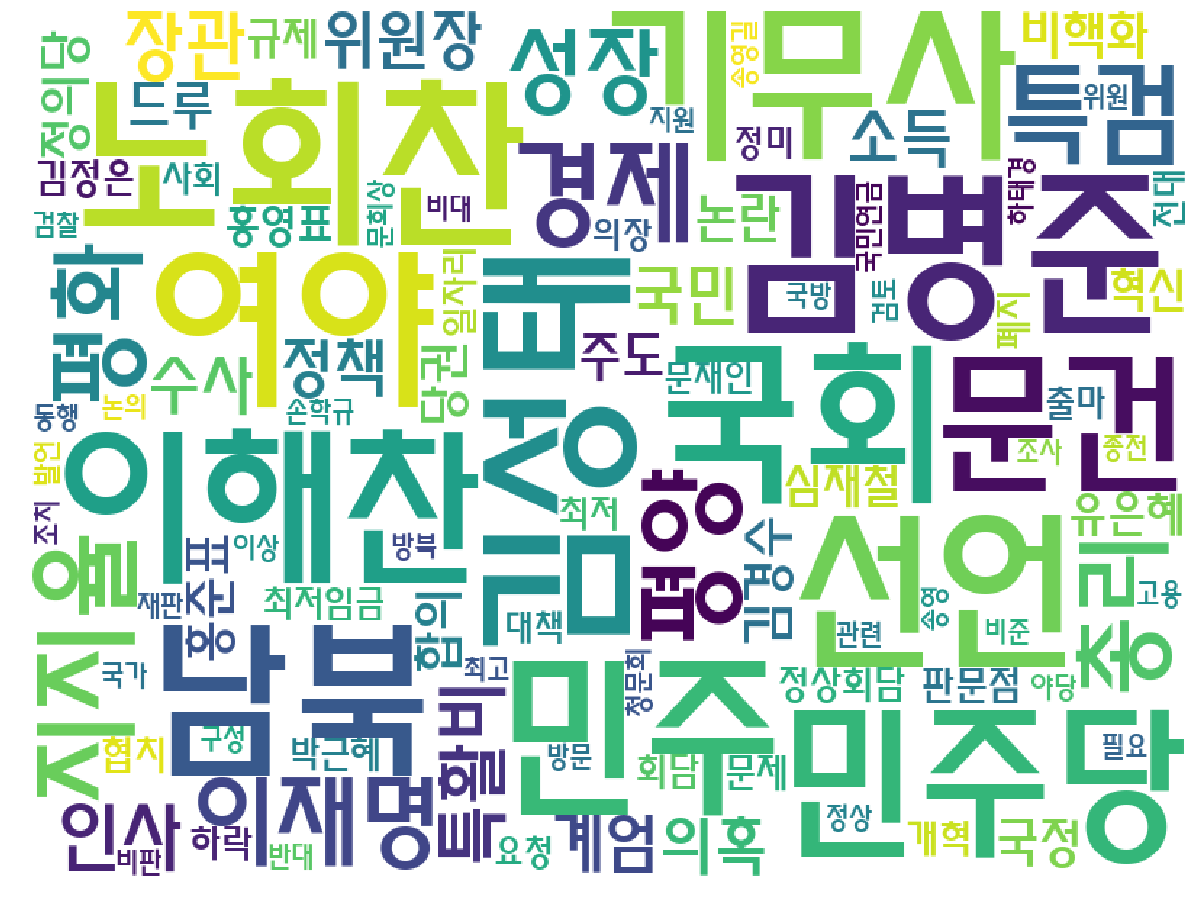

In [33]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

if choose == '1':
    save_img = 'images/segye_%s_title_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
else:
    save_img = 'images/segye_%s_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)